# Evaluating a Linear Regression Model


## Contents

  1. Introduction
  1. Libraries
  1. Example: Advertising Data
  1. Questions About the Advertising Data
  1. Simple Linear Regression
  1. Estimating ("Learning") Model Coefficients
  1. Interpreting Model Coefficients
  1. Using the Model for Prediction
  1. Plotting the Least Squares Line
  1. Confidence in our Model
  1. Hypothesis Testing and p-values
  1. How Well Does the Model Fit the data?
  1. Multiple Linear Regression
  1. Feature Selection
  1. Model Evaluation Metrics for Regression
  1. Model Evaluation Using Train/Test Split
  1. Handling Categorical Features with Two Categories
  1. Handling Categorical Features with More than Two Categories

_This tutorial is derived from Kevin Markham's tutorial on Linear Regression but modified for compatibility with Python 3._



## 1. Introduction

  * Regression problems are supervised learning problems in which the response is continuous
      * Linear regression is a technique that is useful for regression problems.
  * Classification problems are supervised learning problems in which the response is categorical

### Benefits of linear regression

  * widely used
  * runs fast
  * easy to use (not a lot of tuning required)
  * highly interpretable
  * basis for many other methods



## 2. Libraries

  * [Statsmodels](http://statsmodels.sourceforge.net/)
  * [scikit-learn](http://scikit-learn.org/stable/)

In [24]:
pip install sklearn statsmodels seaborn pandas numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=2bd9206f8c274792e4e8fe391b540d088933b7944bb16ee4fe8e36f7b93c3e85
  Stored in directory: /home/yeison/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [26]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

## 3. Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [29]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/Columbia-Intro-Data-Science/python-introduction-caitlinwang/master/www-bcf.usc.edu/%7Egareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
# shape of the DataFrame
data.shape

(200, 4)

/home/yeison/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


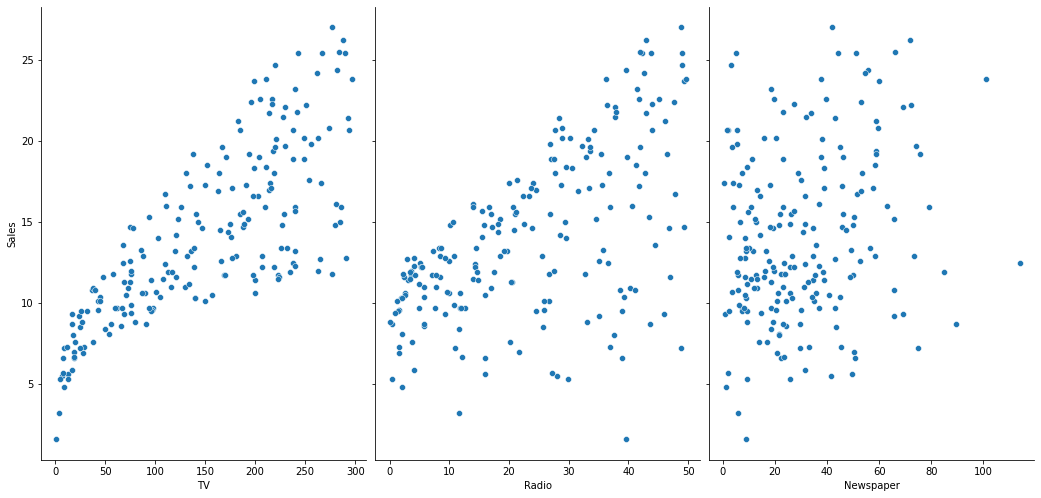

In [31]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

## 4. Questions About the Advertising Data

  * Let's pretend you work for the company that manufactures and markets this widget
  * The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?
  * This general question might lead you to more specific questions:
      1. Is there a relationship between ads and sales?
      1. How strong is that relationship?
      1. Which ad types contribute to sales?
      1. What is the effect of each ad type of sales?
      1. Given ad spending in a particular market, can sales be predicted?

**We will explore these questions below.**

## 5. Simple Linear Regression

  * Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable")
  * It takes the following form:
  * $y = \beta_0 + \beta_1x$

What does each term represent?

  * $y$ is the response
  * $x$ is the feature
  * $\beta_0$ is the intercept
  * $\beta_1$ is the coefficient for $x$
  * $\beta_0$ and $\beta_1$ are called the model coefficients

To create your model, you must "learn" the values of these coefficients. Once we've learned these coefficients, we can use the model to predict Sales.

## 6. Estimating ("Learning") Model Coefficients

  * Coefficients are estimated using the least squares criterion
      * In other words, we find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

Estimating coefficients

What elements are present in the diagram?

  * The black dots are the **observed values** of x and y
  * The blue line is our **least squares line**
  * The red lines are the **residuals**, which are the distances between the observed values and the least squares line

How do the model coefficients relate to the least squares line?

  * $\beta_0$ is the **intercept** (the value of y when x=0)
  * $\beta_1$ is the **slope** (the change in y divided by change in x)

Here is a graphical depiction of those calculations:

Slope-intercept

**Let's estimate the model coefficients for the advertising data**


In [32]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [33]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


## 7. Interpreting Model Coefficients

Interpreting the TV coefficient ($\beta_0$)

  * A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales
  * Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets
  * Note here that the coefficients represent associations, not causations



## 8. Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

$$
y = \beta_0 + \beta_1x \\
y = 7.032594 + 0.047537 \times 50
$$

_We would use 50 instead of 50,000 because the original data consists of examples that are divided by 1000_


# manually calculate the prediction
7.032594 + 0.047537*50


**8a. Manual Prediction**


In [34]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

**8b. Statsmodels Prediction**

In [35]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.409426
dtype: float64

**8c. Scikit-learn Prediction**

In [38]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(np.array([[50]]))

array([9.40942557])

Thus, we would predict Sales of **9,409 widgets** in that market.

## 9. Plotting the Least Squares Line

/home/yeison/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


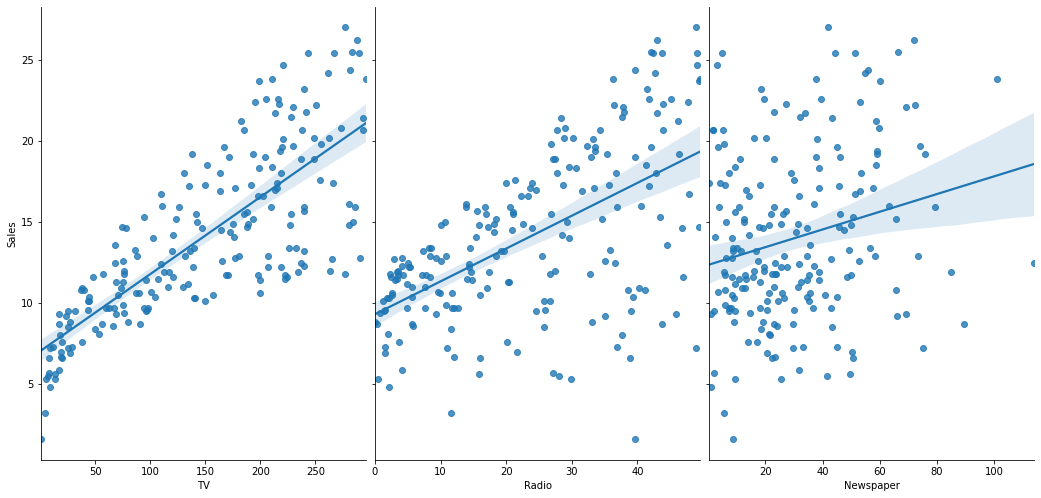

In [39]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## 10. Confidence in our Model

**Question:** Is linear regression a high variance/low bias model, or a low variance/high bias model?

**Answer:**

  * Low variance/high bias
  * Under repeated sampling, the line will stay roughly in the same place (low variance)
      * But the average of those models won't do a great job capturing the true relationship (high bias)
  * Note that low variance is a useful characteristic when you don't have a lot of training data

A closely related concept is **confidence intervals**

  * Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows:
      * If the population from which this sample was drawn was **sampled 100 times**
          * Approximately **95 of those confidence intervals** would contain the "true" coefficient

In [40]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


  * We only have a **single sample of data**, and not the **entire population of data**
  * The "true" coefficient is either within this interval or it isn't, but there's no way to actually know
  * We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within

Note that using 95% confidence intervals is just a convention

  * You can create 90% confidence intervals (which will be more narrow)
  * 99% confidence intervals (which will be wider)
  * or whatever intervals you like.



## 11. Hypothesis Testing and p-values

**Steps for Hypothesis Testing** 

  1. Start with a **null hypothesis** and an alternative hypothesis (that is opposite the null)
  1. Then, you check whether the data supports **rejecting the null hypothesis or failing to reject the null hypothesis
       * "failing to reject" the null is not the same as "accepting" the null hypothesis**
       * The alternative hypothesis may indeed be true, except that you just don't have enough data to show that

**Conventional hypothesis test**

  * **null hypothesis:**
      * There is no relationship between TV ads and Sales
          * $\beta_1$ equals zero

  * **alternative hypothesis:**

      * There is a relationship between TV ads and Sales
          * $\beta_1$ is not equal to zero

  * **Testing hypothesis**

      * Reject the null
          * There is a relationship
          * If the 95% confidence interval **does not include zero**
      * Fail to reject the null
          * There is no relationship
          * If the 95% confidence interval **includes zero**


In [41]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

**p-value**

  * Represents the probability that the coefficient is actually zero

**Interpreting p-values**

  * If the 95% confidence interval **does not include zero**
      * p-value will be **less than 0.05**
      * Reject the null
      * There is a relationship
  * If the 95% confidence interval **includes zero**
      * p-value for that coefficient will be **greater than 0.05**
      * Fail to reject the null
      * There is no relationship

**Notes**

  * p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response
  * In this case, the p-value for TV is far less than 0.05
      * Low probability coefficient actually zero
      * Reject null hypothesis
      * There is a relationship
      * **Believe** that there is a relationship between TV ads and Sales
  * We generally ignore the p-value for the intercept



## 12. How Well Does the Model Fit the data?

To evaluate the overall fit of a linear model, we use the **R-squared** value

  * R-squared is the **proportion of variance explained**
      * It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
          * The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
  * R-squared is between 0 and 1
      * Higher values are better because it means that more variance is explained by the model.

Here's an example of what R-squared "looks like":

R-squared

**Diagram explanation**

  * **Blue line** explains some of the variance in the data (R-squared=0.54)
  * **Green line** explains more of the variance (R-squared=0.64)
  * **Red line** fits the training data even further (R-squared=0.66)

Let's calculate the R-squared value for our simple linear model:


In [42]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.611875050850071

In [43]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.611875050850071

**Is that a "good" R-squared value?**

  * It's hard to say
  * The threshold for a good R-squared value depends widely on the domain
  * Therefore, it's most useful as a tool for **comparing different models**

## 13. Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$
Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's estimate these coefficients:

In [44]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [45]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [46]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

**Interpreting coefficients**

  * For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:


In [47]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        17:19:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

  * TV and Radio have small **p-values**, whereas Newspaper have a large p-value
      * Reject the null hypothesis for TV and Radio
          * There is association between features and Sales
      * Fail to reject the null hypothesis for Newspaper
          * There is no association
  * TV and Radio ad spending are both **positively associated** with Sales
      * Newspaper ad spending is **slightly negatively associated** with Sales
          * However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper
  * This model has a higher **R-squared** (0.897) than the previous model
      * This model provides a better fit to the data than a model that only includes TV


## 14. Feature Selection

Deciding **which features to include** in a linear model

  1. Try different models
  1. Keep features in the model if they have small p-values
       * Reject null hypothesis
       * Relationship exists
  1. Check whether the R-squared value goes up when you add new features

**Drawbacks** to this approach?

  * Linear models rely upon a lot of assumptions
      * Features being independent
          * If assumptions are violated (which they usually are), R-squared and p-values are less reliable
  * Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are **pure noise**, 5 of them (on average) will still be counted as significant
  * R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:



In [48]:
### STATSMODELS ###

# only include TV and Radio in the model

# instantiate and fit model
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()

# calculate r-square 
lm1.rsquared

0.8971942610828956

In [49]:
# add Newspaper to the model (which we believe has no association with Sales)
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm1.rsquared

0.8972106381789522

**Issure with R-squared**

  * **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response
      * Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

**Solution**

  * **Adjusted R-squared**
      * Penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

**Better Solution**

  * **Train/test split** or **cross-validation**
  * More reliable estimate of out-of-sample error
      * Better for choosing which of your models will best **generalize** to out-of-sample data
  * There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models
  * Importantly, cross-validation can be applied to **any model**, whereas the methods described above only apply to **linear models**

## 15. Model Evaluation Metrics for Regression¶

For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$
\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|
$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$
\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$
\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
$$

Let's calculate these by hand, to get an intuitive sense for the results:

In [50]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

10.0
150.0
12.24744871391589


MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

## 16. Model Evaluation Using Train/Test Split

Let's use train/test split with RMSE to see whether Newspaper should be kept in the model:

In [51]:
# include Newspaper
X = data[['TV', 'Radio', 'Newspaper']]
y = data.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


In [52]:
# exclude Newspaper
X = data[['TV', 'Radio']]
y = data.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


## 17. Handling Categorical Features with Two Categories

Up to now, all of our features have been numeric. What if one of our features was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [53]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'

# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data numerically

  * If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value:

In [54]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **Size_large** feature:

In [55]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X = data[feature_cols]
y = data.Sales

# instantiate
lm2 = LinearRegression()
# fit
lm2.fit(X, y)

# print coefficients
list(zip(feature_cols, lm2.coef_))


[('TV', 0.04571982092436277),
 ('Radio', 0.1887281431342785),
 ('Newspaper', -0.001097679448351624),
 ('Size_large', 0.05742385085482783)]

Interpreting the **Size_large coefficient**

  * For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a small market, which is called the **baseline level**).
  * What if we had reversed the 0/1 coding and created the feature 'Size_small' instead?
      * The coefficient would be the same, except it would be **negative instead of positive**
      * As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient

## 18. Handling Categorical Features with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural**, **suburban**, **or urban**:

In [56]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


**Ordered vs Unordered Categories**

  * Have to represent Area numerically
      * Cannot code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban
      * Urban would be somehow "twice" the suburban category
  * Ordered categories
      * i.e., strongly disagree, disagree, neutral, agree, strongly agree
      * Can use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5

Our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:


In [57]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


However, we actually only need **two dummy variables, not three**. Why? Because two dummies captures all of the "information" about the Area feature, and implicitly defines rural as the "baseline level".

Let's see what that looks like:

In [58]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Here is how we interpret the coding:

  * **rural** is coded as Area_suburban=0 and Area_urban=0
  * **suburban** is coded as Area_suburban=1 and Area_urban=0
  * **urban** is coded as Area_suburban=0 and Area_urban=1

If this is confusing, think about why we only needed one dummy variable for Size (Size_large), not two dummy variables (Size_small and Size_large). In general, if you have a categorical feature with k "levels", you create k-1 dummy variables.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model:


In [59]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [60]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04574401036331374),
 ('Radio', 0.18786669552525798),
 ('Newspaper', -0.0010876977267109122),
 ('Size_large', 0.07739660749747915),
 ('Area_suburban', -0.10656299015958612),
 ('Area_urban', 0.26813802165220074)]

How do we interpret the coefficients?

  * Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
  * Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

## 19. What Didn't We Cover?

  * Detecting collinearity
  * Diagnosing model fit
  * Transforming features to fit non-linear relationships
  * Interaction terms
  * Assumptions of linear regression
  * And so much more!

Notes

  * You could certainly go very deep into linear regression, and learn how to apply it really, really well
  * It's an excellent way to **start your modeling process** when working a regression problem
  * However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression

## 20. Resources

  * To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
  * To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
  * This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
  * This is a relatively quick post on the [assumptions of linear regression.](http://pareonline.net/getvn.asp?n=2&v=8)

